In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import importers
import fbprophet
import sklearn
import cpi
import seaborn as sns

import prepare
import explore
#needed for matplotlib to handle plotting pandas
pd.plotting.register_matplotlib_converters()


INFO:cpi:Parsing data files from the BLS


### Acquire 

#### Coffee Data

We initially attempted to use ICO data to produce a model that would predict the global commodity coffee price. Very quickly, we found this question to be impossibly broad, and instead to focus on one country, Colombia.

ICO's data was insufficiently specific, and it only went back until 1990. We began searching for other data sources and ultimately found the National Federation of Coffee Growers of Colombia, commonly abbreviated FedCafe.

After some difficulty with the language barrier, we downloaded a few Excel files that detailed the export coffee prices for Excelso coffee. Excelso is a size grading of coffee which is the second largest bean. This is the most commonly exported Colombian coffee bean.

#### Weather Data

In [2]:
df = prepare.get_data()

### Prep

In [3]:
df2 = prepare.get_prepped()

### Exploration

After acquiring and cleaning the data, we started to explore what our chosen features looked like over time for the top 13 coffee producing departments of Colombia. Each coffee producing region is then separated into one of three zones, the Northern zone, the Central zone, and the Southern one.

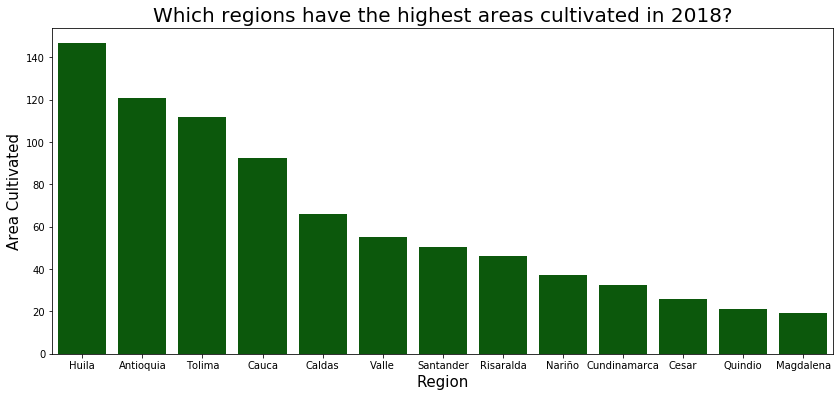

In [4]:
# Look at price distribution per region
explore.area_cultivated()

**Takeaways:** 
- Hulia, located in the southern coffee zone of Colombia, has the largest area of cultivated land for coffee production. (estimate of how many coffee farms are in huila)
- Antioquia and Tolima follow in second and third place, both located in the Central zone of coffee production. (estimate of farms in both combined)

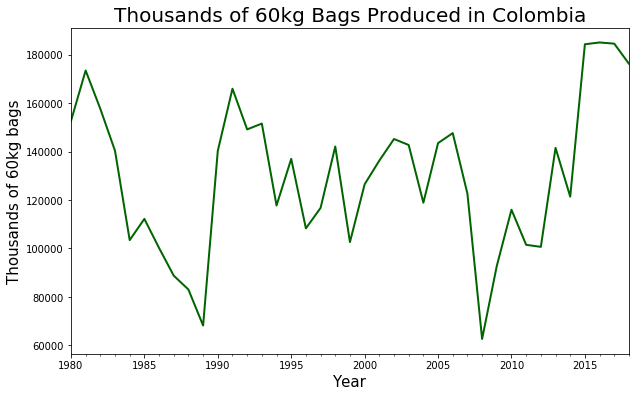

In [5]:
# Production by region 1980-2018
explore.production_graph(df)

#### Initial exploration showed significant volatility in coffee production and precipitation. We also looked at the volatility in average temperature compared to coffee production to look for any correlation between the features and our target.

*Average Precipitation*

Average Precipitation by Region of Colombia


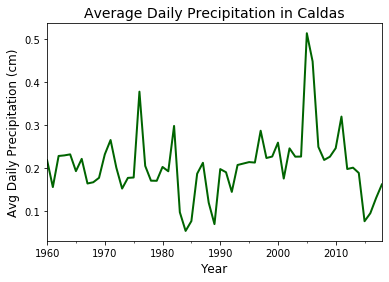

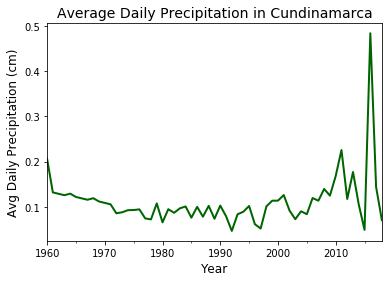

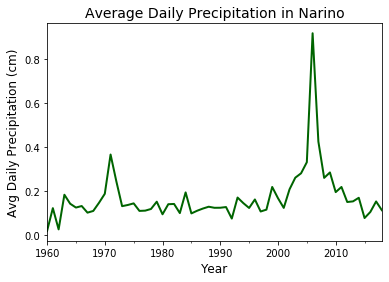

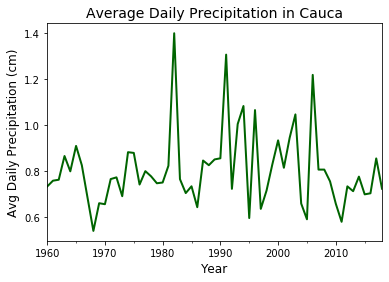

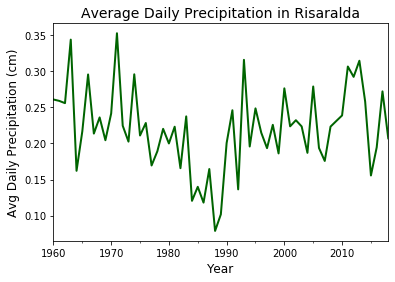

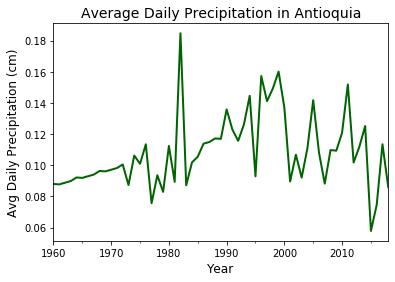

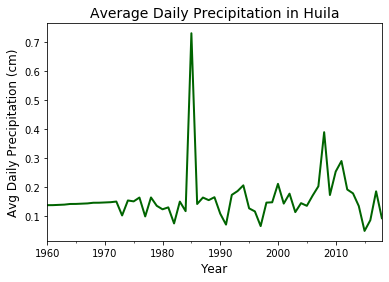

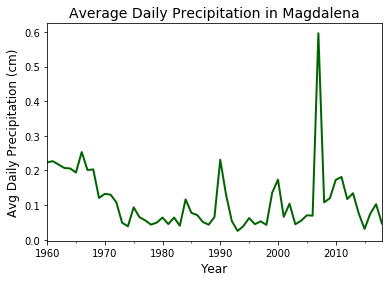

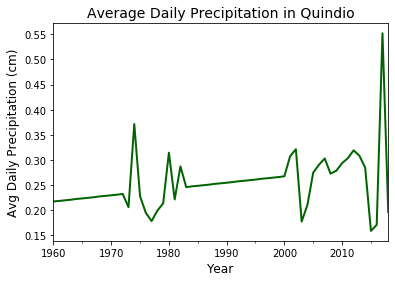

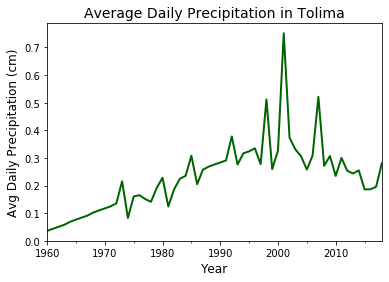

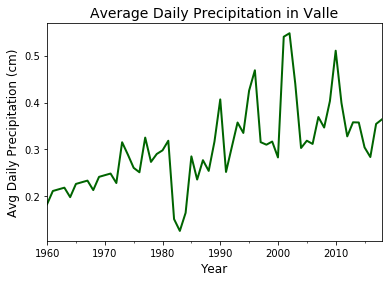

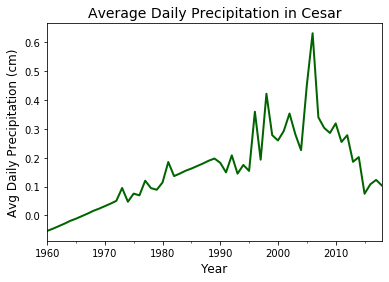

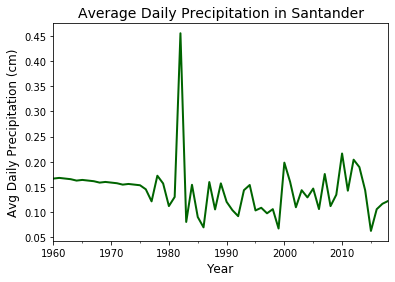

In [6]:
# Precipitation by region
explore.precipitation_by_region(df2)

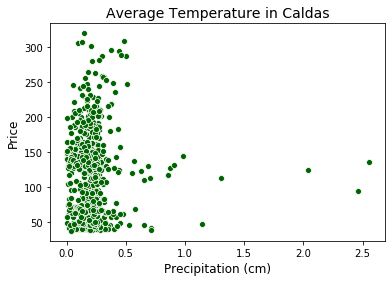

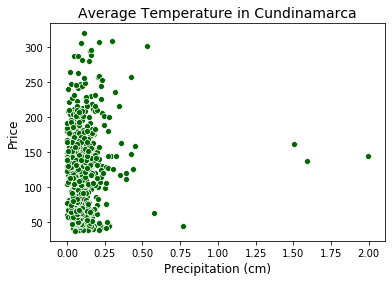

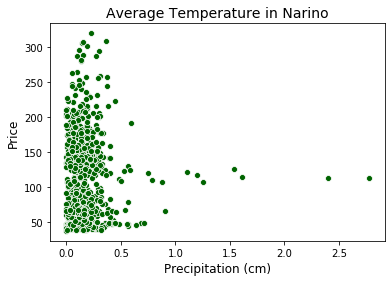

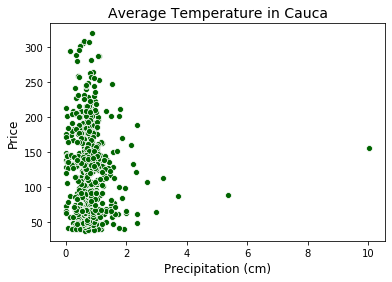

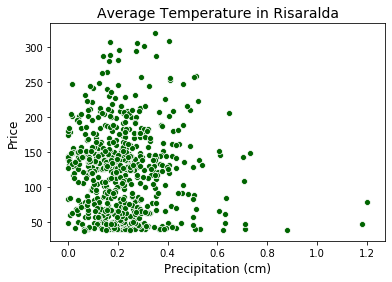

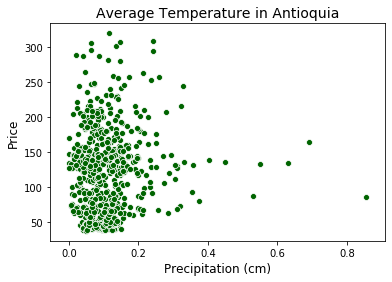

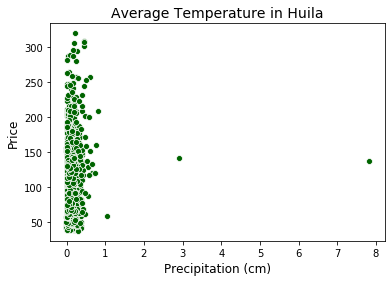

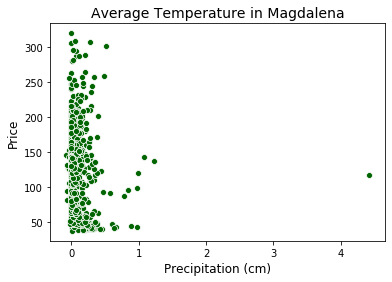

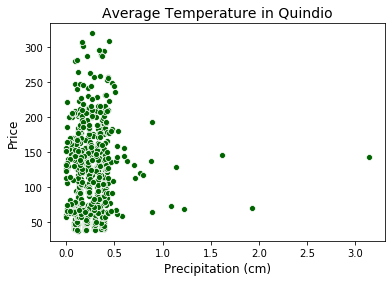

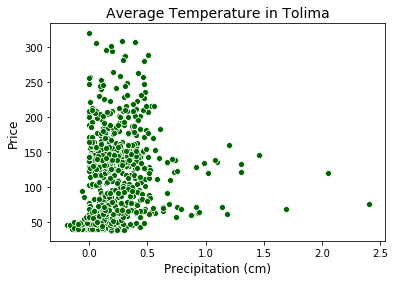

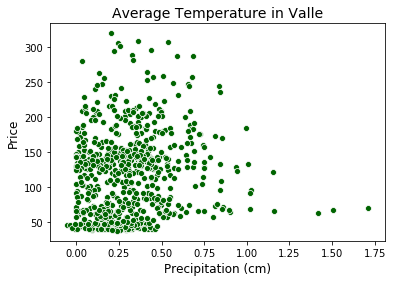

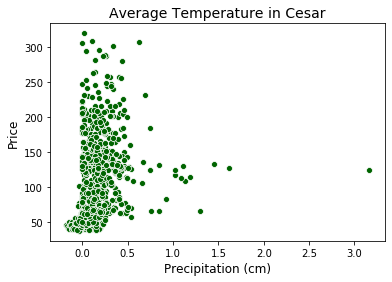

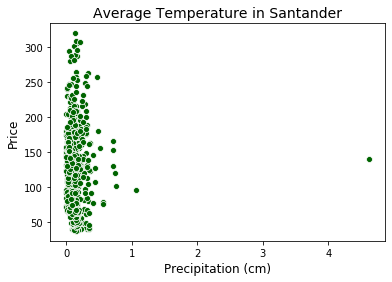

In [7]:
# Does the average precipitation by region correlate with inflated price of coffee?
explore.corr_price_and_precip(df2)

**Takeaways:** The average precipitation is slightly different for each region. When looking at the correlation between the average precipitation and price of coffee exported, most of the regions look the same, with the precipitation falling between 0 and 1 cm and spread out pretty evenly between $50 - 300 USD.

*Average Temperature*

Average Temperature by Region of Colombia


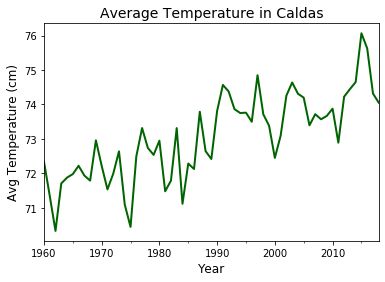

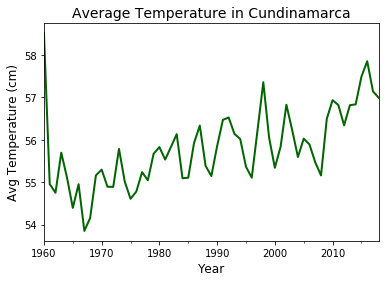

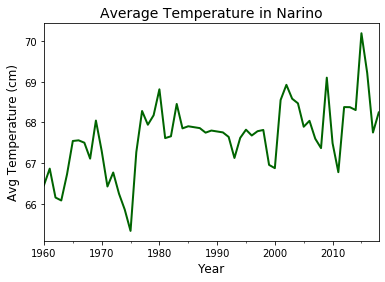

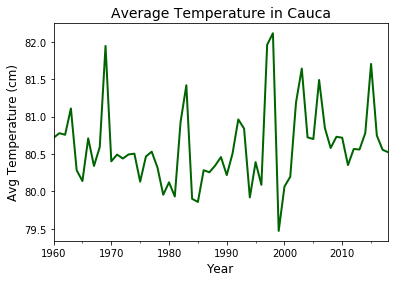

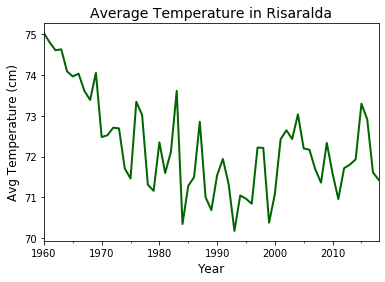

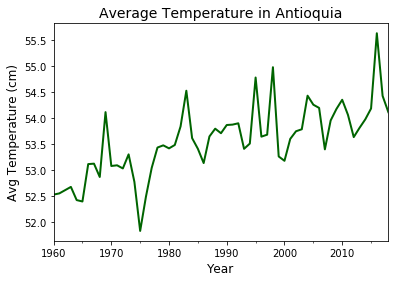

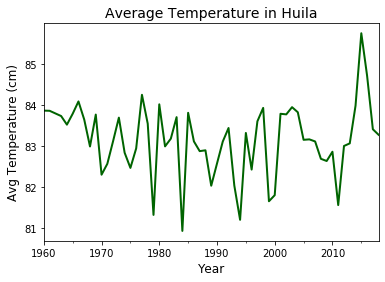

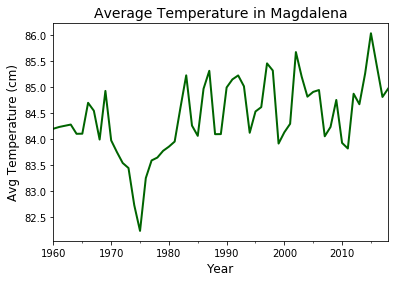

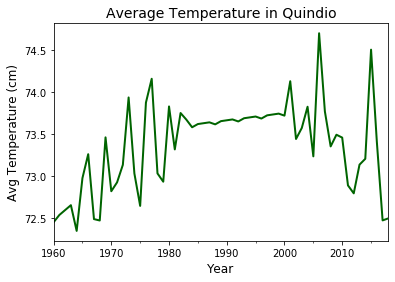

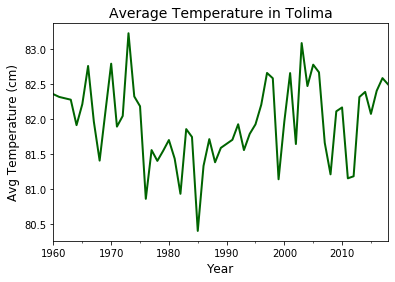

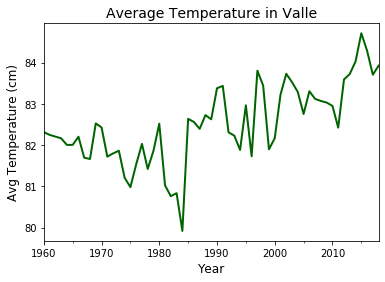

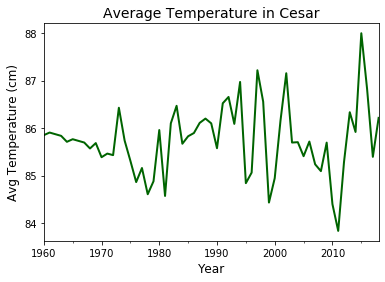

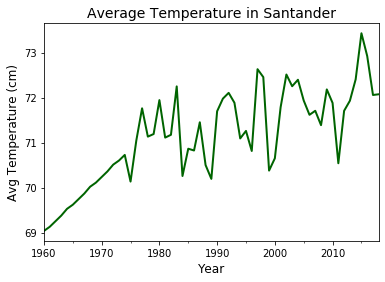

In [8]:
#Average temperature by region
explore.avg_temp_by_region(df2)

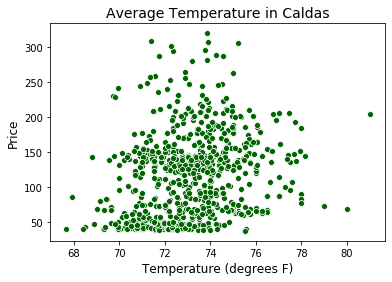

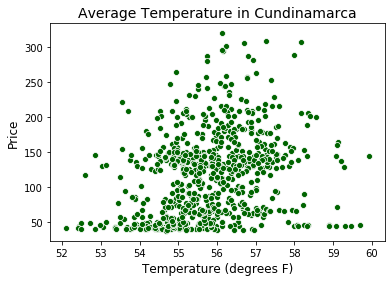

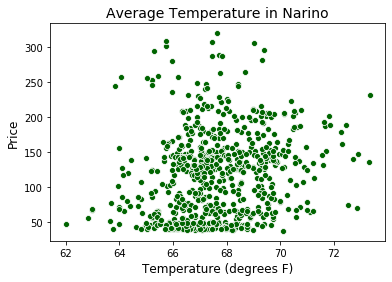

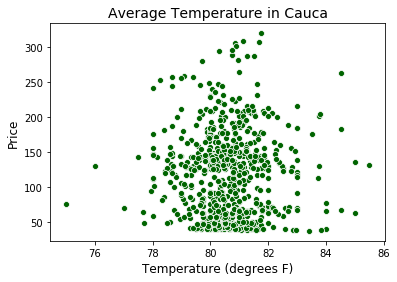

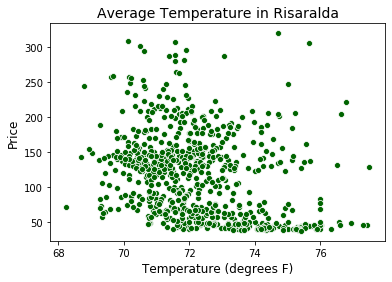

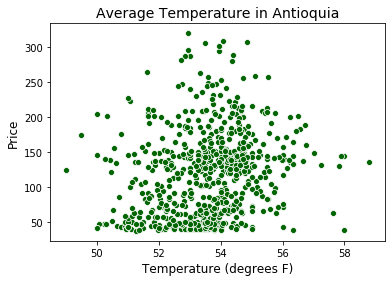

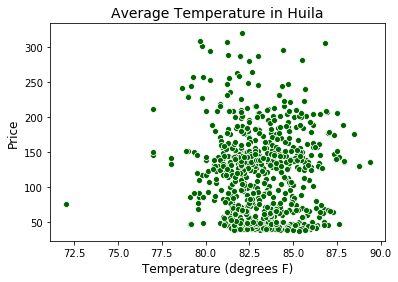

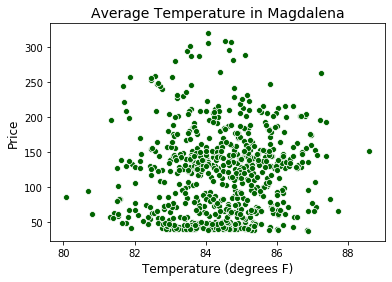

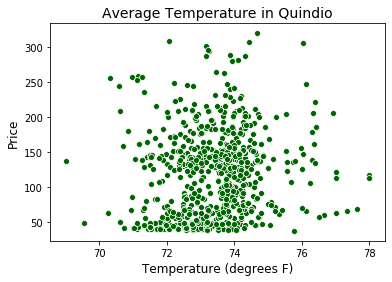

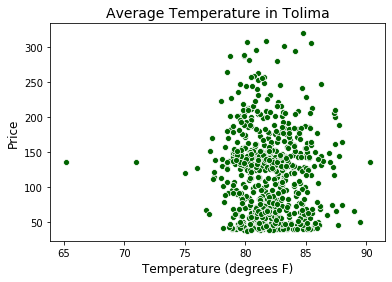

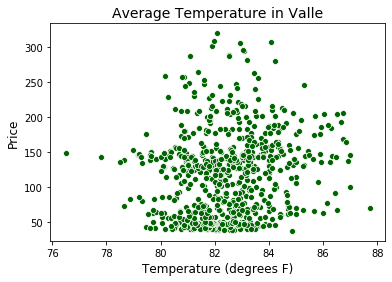

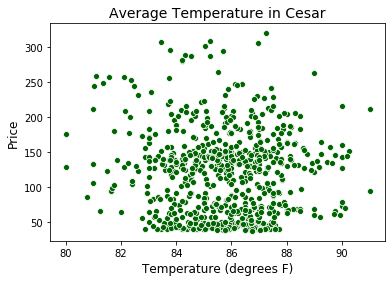

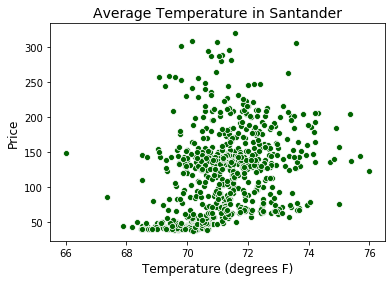

In [9]:
# Does the average temperature by region correlate with inflated price of coffee?
explore.corr_price_and_temp(df2)

**Takeaways:** Most of the regions have a general upward trend in their average temperatures over time. When looking at the correlation between the average temperature per region and coffee prices, there are no obvious correlations, but rather a cluster in the middle of the graph. 

#### With further exploration, we discovered that major weather events were better at predicting price spikes than day-to-day weather.

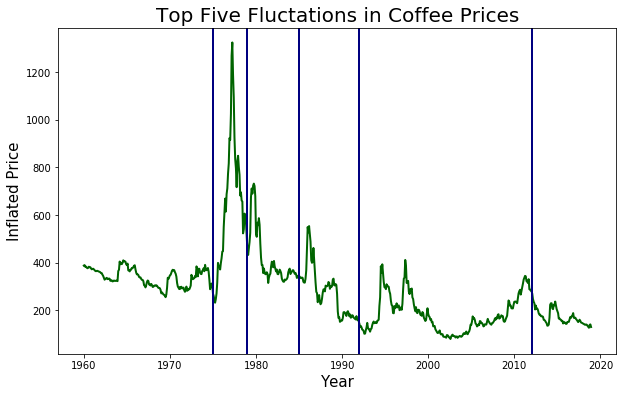

In [10]:
# Looking at possible causes of dramatic changes to price over time in data
explore.events_over_time(df2)

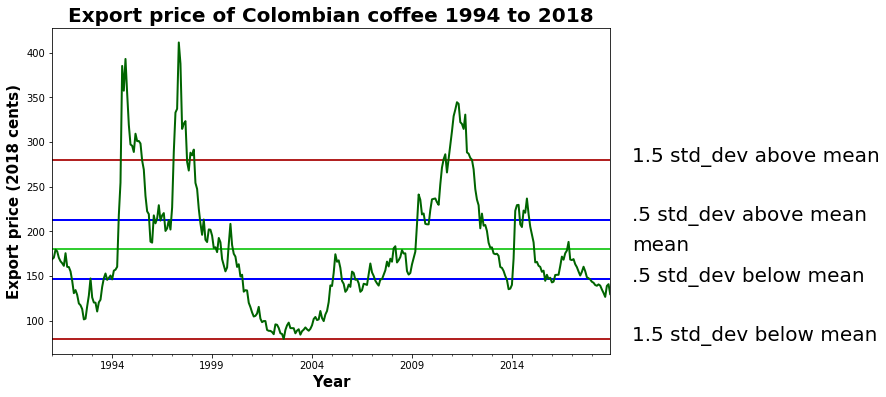

In [11]:
explore.export_price_1991_2018(df2)

#### The Observatory of Economic Complexity Data Exploration
After acquisition and preparation of the OEC's data we wanted to explore Colombia's export numbers to other countries and attempt to uncover trends within the data. 
Initially we compared Colombia's exports to Brazil's looking to see if there was any indicators from Brazil's exports that Colombia's exports would move in any particular direction. As noticed in the graph below there's not pre-movement indicators from Brazil's production. 

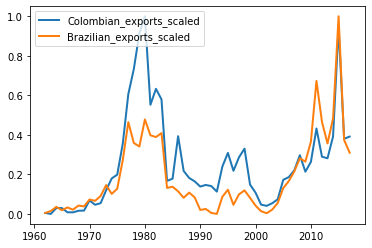

In [12]:
importers.compare_brazil()

## Bar chart showing top 10 importers between 1962 and 2017. 


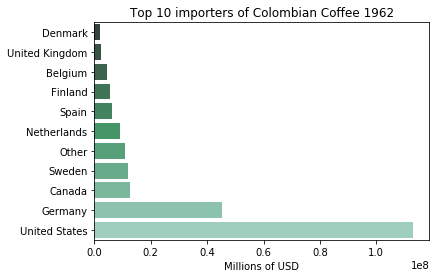

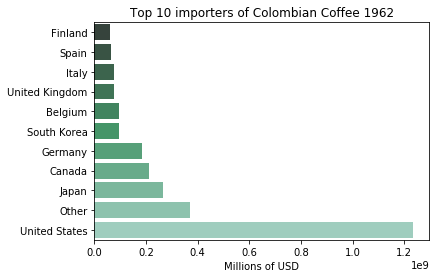

In [13]:
importers.compare_import_change()

#### Correlating Volatility
We wanted to see if the increased volatility of a prior years production numbers would increase volatility of next year's price. TO BE CONTINUED


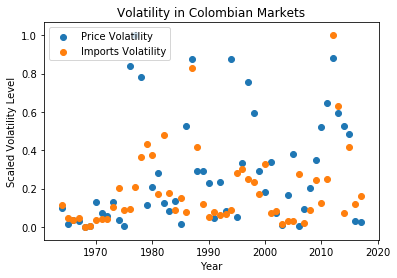

In [14]:
importers.get_volatility_graph()

In [15]:
#corr

##### Exploratory models




We discovered a noticeable shift in 

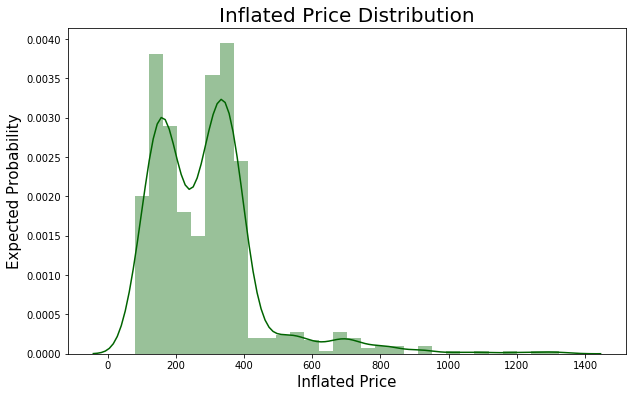

In [16]:
#After reviewing the data distribution we saw that the pricing was bimodal
#Splitting the data for modeling was greatly improved based on this analysis
explore.dist_of_price(df2)

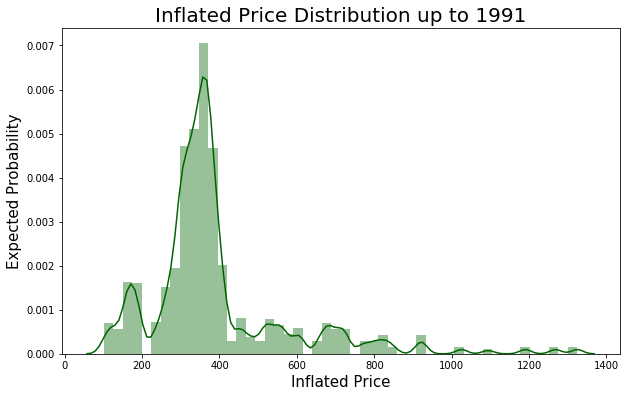

In [17]:
#pre 1991
explore.dist_before(df)

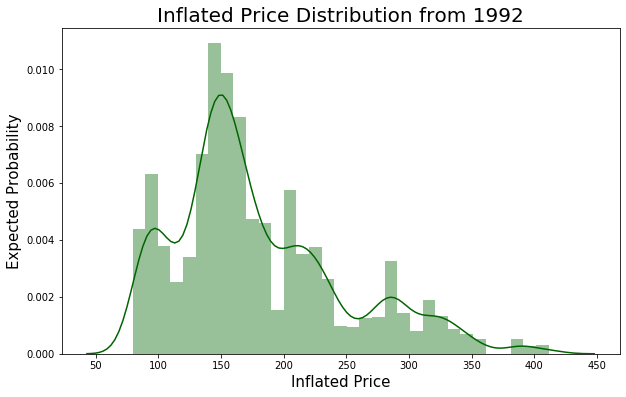

In [18]:
#post 1991
explore.dist_after(df)

### Model